**Feature Matching**

In template matching, we were required to have an exact copy of the target image. But it is always not possible to have the exact copy. Also, Feature Matching is not at all generic! Hence, we can't use it in many useful applications. Here's where Feature Matching comes into play. Basically, Feature Matching extracts features from an input image, using techiniques like corner,edge,and contour detection. Then the distance is found out between the two images, and through this we can find the matches in the secondary image.

We'll see 3 methods to perform this:

1)Brute-Force Matching with ORB Descriptors

2)Brute-Force Matching with with SIFT Descriptors and Ratio Test

3)FLANN Based Matcher

Let's understand more about Brute-Force Matching. So let us consider two images, A and B. This algorithm basically, takes one descriptor of Image A, and matches it with all the descriptors of Image B, which is followed by the taking of the second descriptor of Image A, and matching it with all the descriptors of Image B, and this process continues. The closest value is returned.

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Function to display the larger version of the image
def display(image,cmap='gray'):
    fig = plt.figure(figsize=(12,10)) 
    ax = fig.add_subplot(111) 
    ax.imshow(image,cmap='gray') 

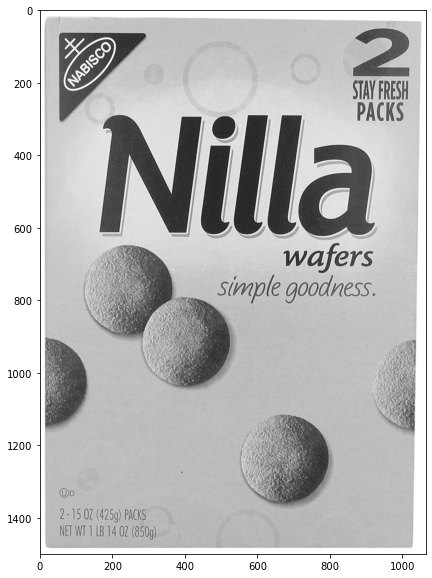

In [3]:
img = cv2.imread('C:/Users/email/OneDrive/Pictures/Nilla_Box.jpg')  
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
display(img) 

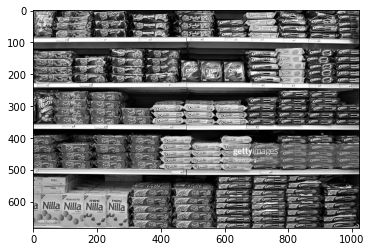

In [5]:
shelf_img = cv2.imread('C:/Users/email/OneDrive/Pictures/Nilla_Shelf.jpg') 
shelf_img = cv2.cvtColor(shelf_img,cv2.COLOR_BGR2GRAY)  
plt.imshow(shelf_img,cmap='gray')

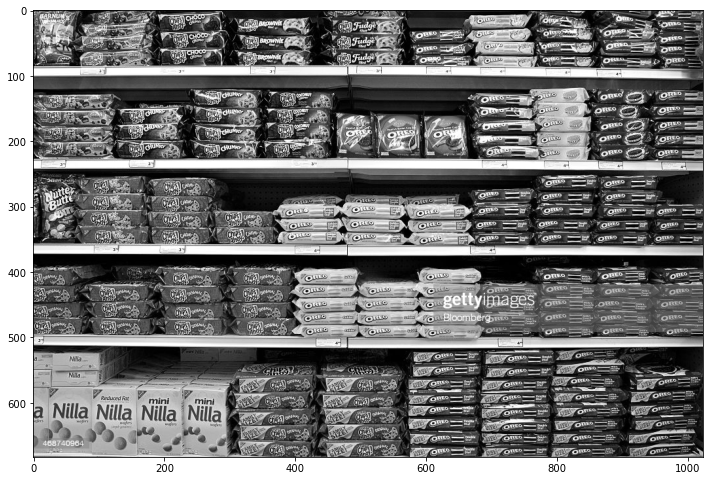

In [6]:
display(shelf_img) 

Now we perform Brute-Force Matching with ORB Descriptors. For more details on what exactly ORB is, refer this website: https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf .

In [7]:
#Creating our Detector Object
orb = cv2.ORB_create() 

We find the descriptors off of the detector object we just created, using orb.detectAndCompute(image,mask). If you're not masking it, then enter None as the mask parameter. This returns the keypoints and the descriptors.

In [8]:
kp1,des1 = orb.detectAndCompute(img,None) 
kp2,des2 = orb.detectAndCompute(shelf_img,None) 

In [9]:
#Creating the Brute-Force Matching Object
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True) 
matches = bf.match(des1,des2) 

The first parameter in cv2.BFMatcher(normType,crossCheck), is normType. This specifies the type of distance measurement we are using. The default setting is cv2.NORM_L2, which is used when we use SIFT descriptors. When we use ORB descriptor, we need to use cv2.NORM_HAMMING.

In [10]:
matches

[<DMatch 000001F019F67A90>,
 <DMatch 000001F018FB9F10>,
 <DMatch 000001F018FA0450>,
 <DMatch 000001F018FA0730>,
 <DMatch 000001F018FA06B0>,
 <DMatch 000001F018FA0930>,
 <DMatch 000001F018FA0CD0>,
 <DMatch 000001F018FA01B0>,
 <DMatch 000001F018FA0230>,
 <DMatch 000001F018FA0A30>,
 <DMatch 000001F018DB87B0>,
 <DMatch 000001F018DB8AD0>,
 <DMatch 000001F018DB8C10>,
 <DMatch 000001F018DB8B30>,
 <DMatch 000001F018DB8A30>,
 <DMatch 000001F018DB8770>,
 <DMatch 000001F018DB8750>,
 <DMatch 000001F018DB8730>,
 <DMatch 000001F018DB8C30>,
 <DMatch 000001F018DB8A70>,
 <DMatch 000001F018DB8BF0>,
 <DMatch 000001F018DB8A50>,
 <DMatch 000001F018DB8CF0>,
 <DMatch 000001F018DB8E10>,
 <DMatch 000001F018DB8CD0>,
 <DMatch 000001F018DB8C50>,
 <DMatch 000001F018DB8C90>,
 <DMatch 000001F018DB8810>,
 <DMatch 000001F018DB8790>,
 <DMatch 000001F018DB8BB0>,
 <DMatch 000001F018DB8AF0>,
 <DMatch 000001F018DB8B50>,
 <DMatch 000001F018DB87F0>,
 <DMatch 000001F018DB8B10>,
 <DMatch 000001F018DB8DB0>,
 <DMatch 000001F018D

These are essentially the match objects. These have many attributes. The attribute which is of utmost importance to us is the "distance" attribute.

In [12]:
match_1 = matches[0] 
match_1.distance

59.0

Lesser the value of the distance, the better the match is!

In [13]:
matches = sorted(matches,key=lambda x:x.distance) 

In [18]:
#This draws the matches
#We are selecting the first 15 matches for the sake of visibility
#None indicates we are not using any mask
nilla_matches = cv2.drawMatches(img,kp1,shelf_img,kp2,matches[:15],None,flags=2)  

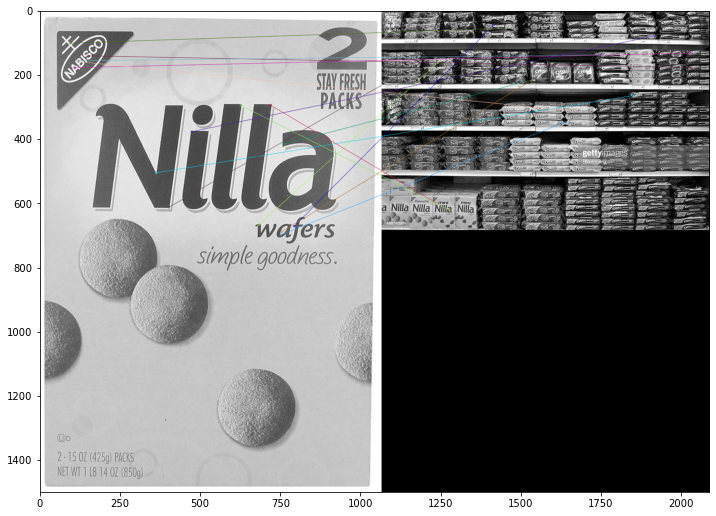

In [19]:
display(nilla_matches) 

Let's try Brute-Force Matching with with SIFT Descriptors and Ratio Test. For more details on what exactly SIFT is, refer this website: https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/ .

In [22]:
#Creating SIFT object
sift = cv2.SIFT_create() 
#Keypoints and Desciptors
kp1,des1 = sift.detectAndCompute(img,None) 
kp2,des2 = sift.detectAndCompute(shelf_img,None) 

In [25]:
#Creating the Brute-Force Matching Object
bf = cv2.BFMatcher() 
matches = bf.knnMatch(des1,des2,k=2) #We get the k-best matches. We took k=2, and next we can apply the ratio test

In [26]:
matches

[[<DMatch 000001F01AB60B30>, <DMatch 000001F01AB60990>],
 [<DMatch 000001F018F0E910>, <DMatch 000001F018F0E810>],
 [<DMatch 000001F018F0E830>, <DMatch 000001F018F0E7F0>],
 [<DMatch 000001F018F0E950>, <DMatch 000001F018F0E970>],
 [<DMatch 000001F018F0E930>, <DMatch 000001F018F0E890>],
 [<DMatch 000001F018F0E8B0>, <DMatch 000001F018F0E990>],
 [<DMatch 000001F018F0E9B0>, <DMatch 000001F018F0E9D0>],
 [<DMatch 000001F018F0E9F0>, <DMatch 000001F018F0EA10>],
 [<DMatch 000001F018F0EA30>, <DMatch 000001F018F0EA50>],
 [<DMatch 000001F018F0EA70>, <DMatch 000001F018F0EA90>],
 [<DMatch 000001F018F0EAB0>, <DMatch 000001F018F0EAD0>],
 [<DMatch 000001F018F0EAF0>, <DMatch 000001F018F0EB10>],
 [<DMatch 000001F018F0EB30>, <DMatch 000001F018F0EB50>],
 [<DMatch 000001F018F0EB70>, <DMatch 000001F018F0EB90>],
 [<DMatch 000001F018F0EBB0>, <DMatch 000001F018F0EBD0>],
 [<DMatch 000001F018F0EBF0>, <DMatch 000001F018F0EC10>],
 [<DMatch 000001F018F0EC30>, <DMatch 000001F018F0EC50>],
 [<DMatch 000001F018F0EC70>, <D

We use the ratio test to check if both the matches are relatively close in distance.

In [27]:
good = []
for match1,match2 in matches:
    #MATCH 1 DISTANCE < 75% OF MATCH 2 DISTANCE, THEN THE DESCRIPTOR IS A GOOD MATCH
    if match1.distance < 0.75*match2.distance:
        good.append([match1])  

In [28]:
len(good) 

71

In [29]:
len(matches) 

6562

In [30]:
sift_matches = cv2.drawMatchesKnn(img,kp1,shelf_img,kp2,good,None,flags=2) 

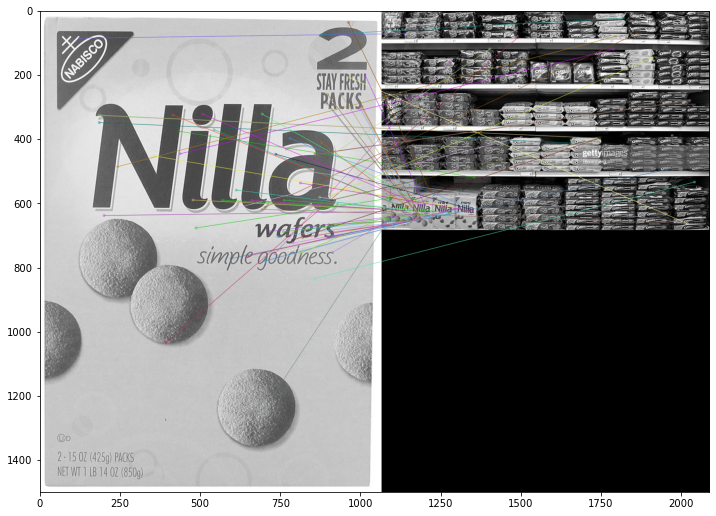

In [32]:
display(sift_matches) 

This performed much better as compared to the performance when we used ORB Descriptors.

Now, let's try implementing the FLANN-Based Matcher. This only finds the approximate nearest neighbours, unlike the other methods.

In [43]:
#Creating SIFT object
sift = cv2.SIFT_create() 
#Keypoints and Desciptors
kp1,des1 = sift.detectAndCompute(img,None) 
kp2,des2 = sift.detectAndCompute(shelf_img,None) 

SearchParams specifies the number of times the trees in the index should be recursively gone through. Higher values gives us a higher precision, but it takes more time. 


In [44]:
#FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5) 
search_params = dict(checks=50)

In [45]:
#FLANN Object
flann = cv2.FlannBasedMatcher(index_params,search_params) 

In [46]:
matches = flann.knnMatch(des1,des2,k=2) 

In [47]:
#Using mask as we want good matches
matchesMask = [[0,0] for i in range(len(matches))] 

In [53]:
for i,(match1,match2) in enumerate(matches): 
    #MATCH 1 DISTANCE < 75% OF MATCH 2 DISTANCE, THEN THE DESCRIPTOR IS A GOOD MATCH
    if match1.distance < 0.75*match2.distance:
        matchesMask[i]=[1,0]
#         good.append([match1]) 

In [56]:
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0) 

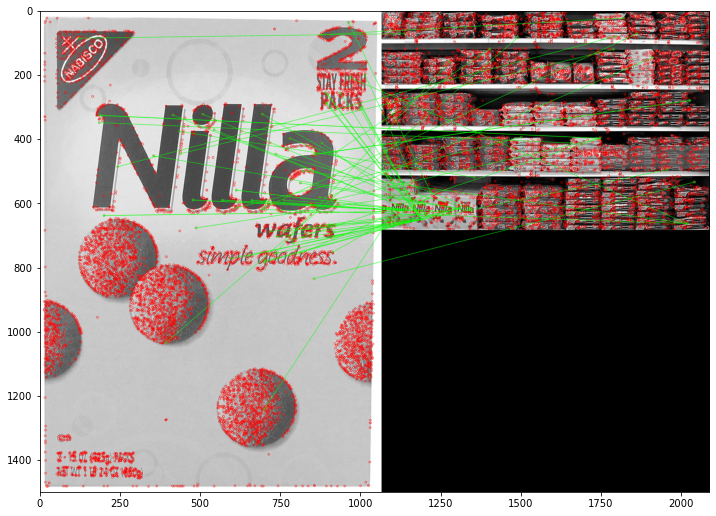

In [59]:
flann_matches = cv2.drawMatchesKnn(img,kp1,shelf_img,kp2,matches,None,**draw_params) 
display(flann_matches) 

**Watershed Algorithm**

What is a watershed? Basically, a watershed is an area of land where all of the water that drains off of it, goes into the same water body, like a river,stream, or lake. This algorithm treats the image as if it is a topographic map, also the brightness of each point represents its height, and finds the lines that run along the tops of ridges.

A grayscale surface can be seen as a topographical surface, where peaks are denoted by high intensity and valleys are denoted by low intensity (see the last paragraph). The algorithm can fill every isolated valley, which is the local minima, with water of different colors, which are like labels. When the water rises, depending on the peaks (gradients) nearby, the "water" from different valleys (different segments of the image), with different colors would start to merge. To circumvent merging, this algorithm creates boundaries, known as segment edge boundaries, in the locations where the "water" will tend to merge. This algorithm would be helpful for segmenting images into foreground and background. 

In [2]:
#Importing all the libraries again
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10)) 
    ax = fig.add_subplot(111) 
    ax.imshow(img,cmap='gray') 

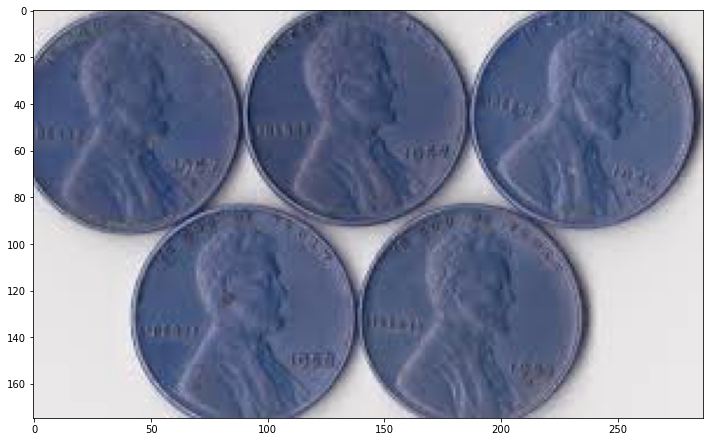

In [16]:
pennies_img = cv2.imread('C:/Users/email/OneDrive/Pictures/pennies.jfif') 
display(pennies_img)  

We first apply the median blur on the image, this would help us to get rid of the features which are not needed. After doing this, we convert the image to grayscale. After this, we apply a binary threshold, to make it appear black and white. Then we find the contours.

In [29]:
sep_blur = cv2.medianBlur(pennies_img,3)    

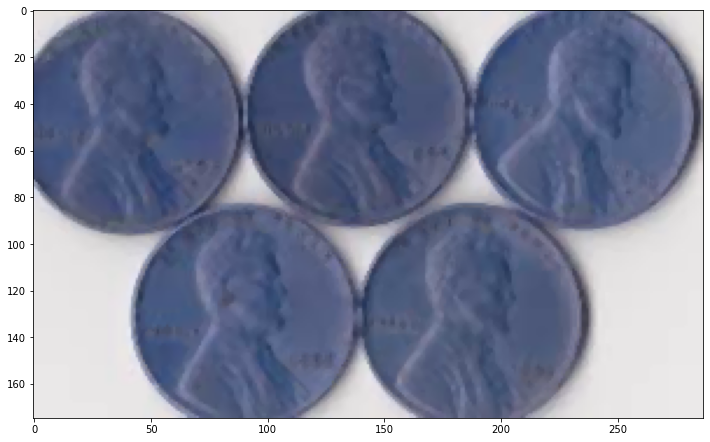

In [30]:
display(sep_blur) 

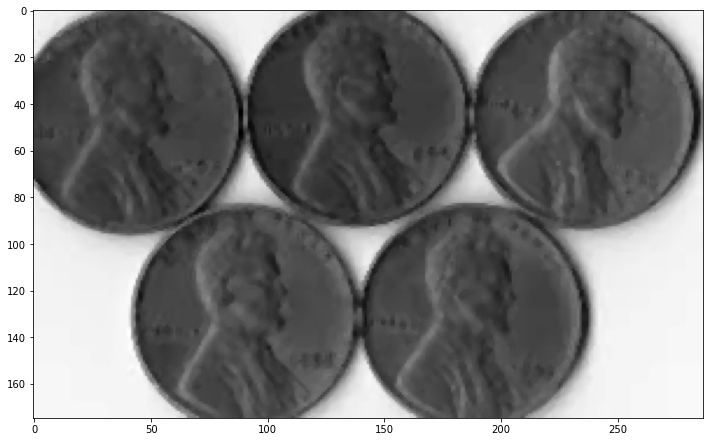

In [32]:
gray_sep_blur = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY) 
display(gray_sep_blur) 

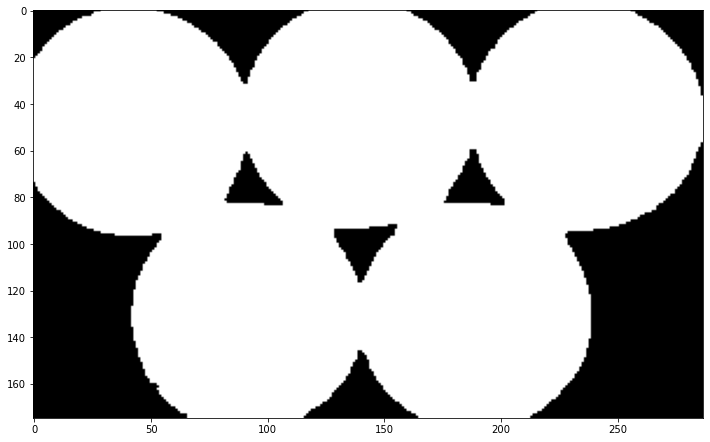

In [33]:
ret, sep_thresh = cv2.threshold(gray_sep_blur,160,255,cv2.THRESH_BINARY_INV) #Foreground white
display(sep_thresh) 

In [39]:
contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE) 

In [40]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1: #Extra Contours
        cv2.drawContours(pennies_img,contours,i,(255,0,0),10) 

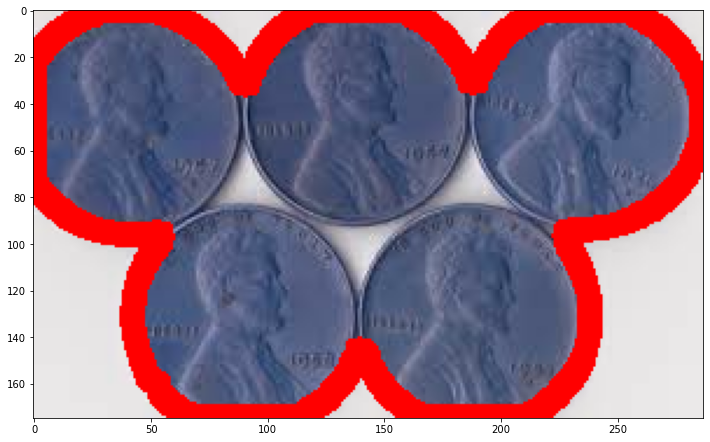

In [41]:
display(pennies_img) 

We tried to segment the image, but using the techniques we learnt from the previous sections, we were only able to create a giant contour, and we could not segment the image the way we wanted to T_T.

Let's try to use the Watershed Algorithm to segment the image.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

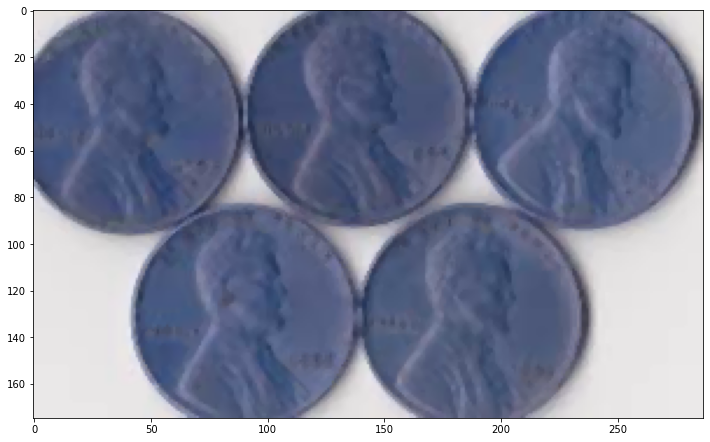

In [7]:
pennies_img = cv2.imread('C:/Users/email/OneDrive/Pictures/pennies.jfif') 
pennies_img = cv2.medianBlur(pennies_img,3)     
display(pennies_img) 

In [8]:
grayed_img = cv2.cvtColor(pennies_img,cv2.COLOR_BGR2GRAY) 
#Thresholding the Grayscaled Image
ret,thresh = cv2.threshold(grayed_img,127,255,cv2.THRESH_BINARY_INV) 

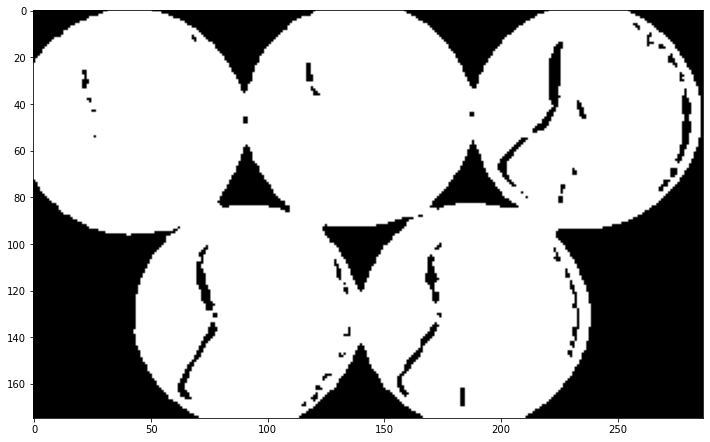

In [9]:
display(thresh) 

Some noise is visible due to the extra features. We can minimize this noise by using the Otsu's method, which is another thresholding method. Essentially this returns a single intensity which will seperate the pixels into 2 classes, foreground and background. 

To understand this better, let us take a 6-level 6x6 grayscale image, with the histogram.

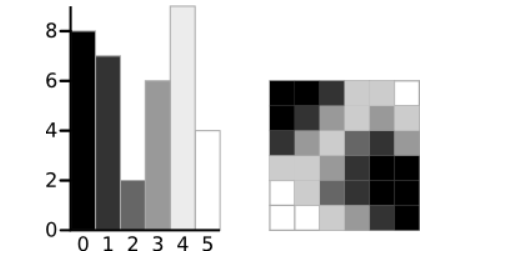

Let us take the threshold value to be 3...In this case for the background

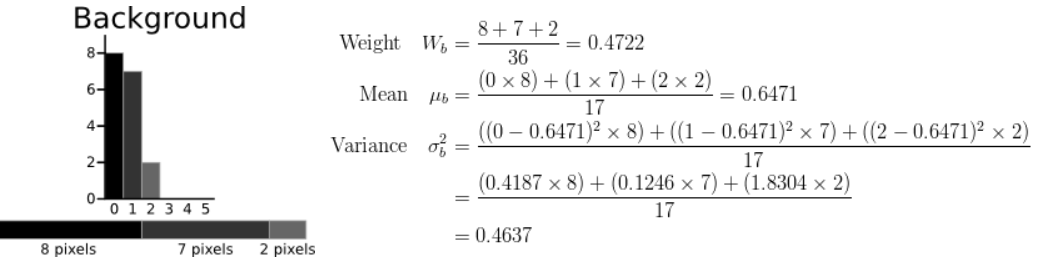


For the foreground 

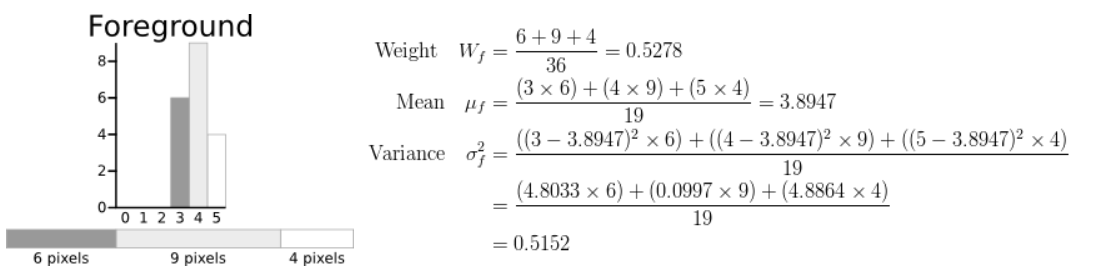

I'll explain the computations done in the above two images. Let's inspect the background part above. Basically, we are adding the probabilities of each intensity before 3, as we are calculating assuming the threshold is 3. This is the same as adding the y-axis values, and dividing it by 36, which is the sum of all the y-axis values of the corresponding intensities.

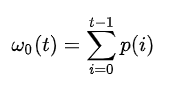

After this we are finding the mean value, we multiply 0 with 8 in background's mean computing numerator as the y-axis value corresponding to intensity 0 is 8, the other multiplications in the numerator follow the same logic. Then this is divided by 17 (This is not the calculation of weight, so the y-axis values to the right of 3 should be considered. The sum of these values total up to 17. Similarly, the variance is also calculated, using it's respective formula.

The sum of the mean for the foreground and background sum up to 1. Same implies to the variance. 

Now our next step is to calculate the Within-Class Variance.

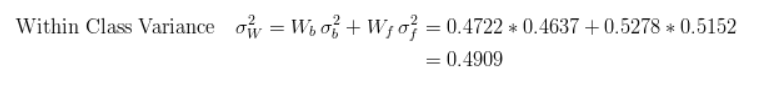

We calculate the weight, mean, and variance for the background and foreground, and the within class variance for the threshold values from T=0, to T=5 (w.r.t the above example). We have already found out the necessary values for T=3. 

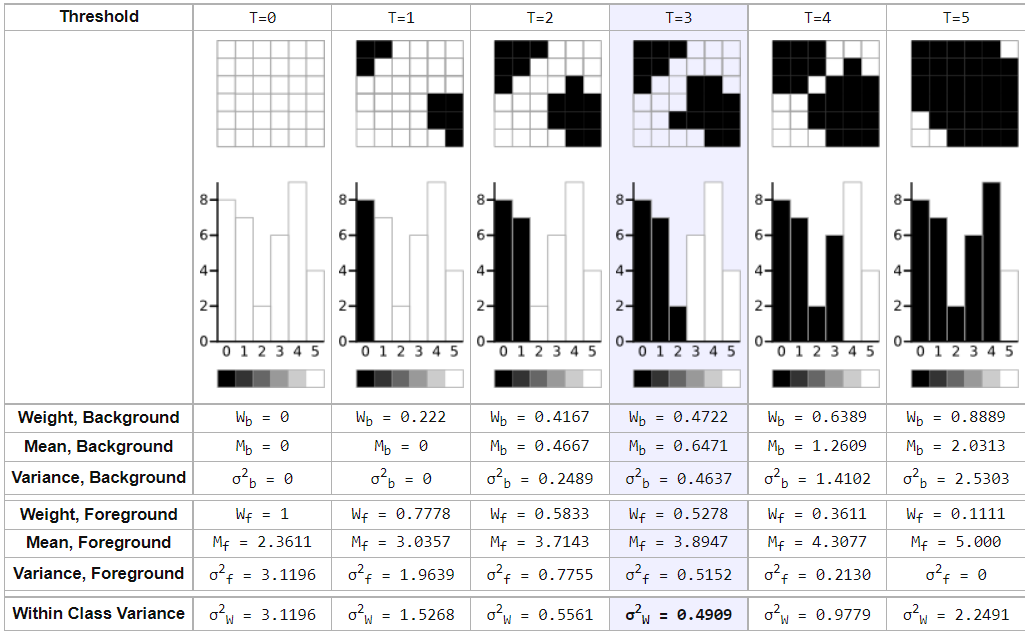

The Within Class Variance for T=3 is the least. So this is the threshold. All the pixels with the intensity level less than 3 is the background, and those with a level greater than or equal to 3 is the foreground.

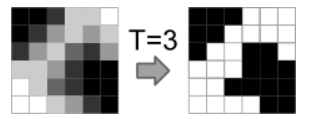

In [10]:
ret,thresh = cv2.threshold(grayed_img,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)  

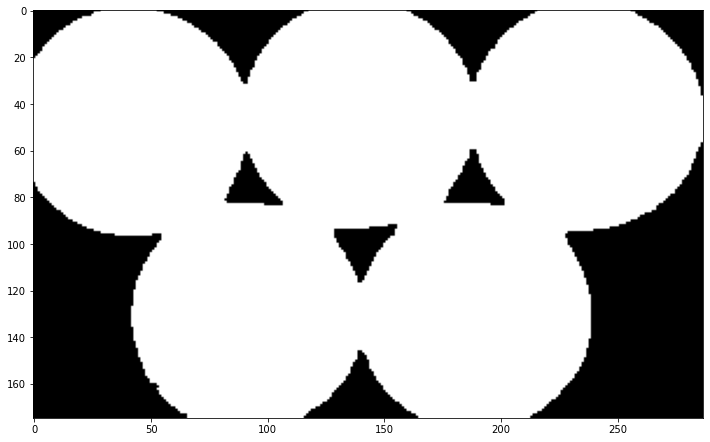

In [11]:
display(thresh) 

The coins are still joined :(

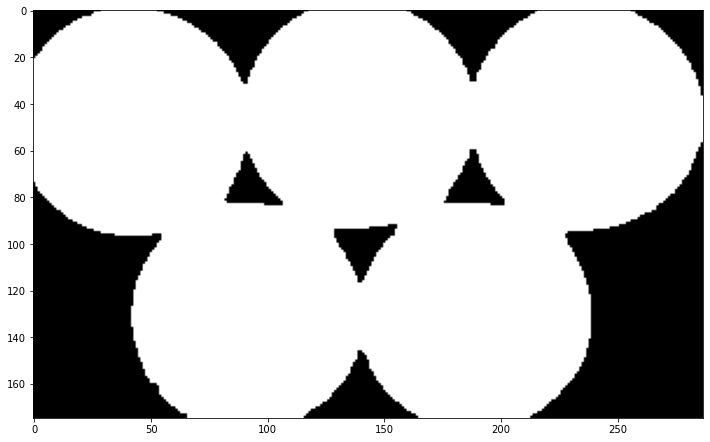

In [13]:
#NOISE REMOVAL
kernel = np.ones((3,3),np.uint8) 
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2) 
display(opening) 

We have to set seeds that are for sure in the foreground, and we want 5 seeds which are at the center of the coin. We can try out Distance Transform. 

Distance Transform is for a binary image. A binary image is usually comprised of 0 and 1. What distance transform does is as pixels are further away from zeros, then their value ends up getting higher, i.e, brighter.

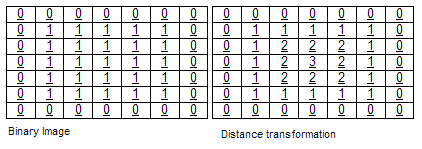

So the centers of the images are brighter, and the points closer to the black region are faded away.

cv2.distanceTransform(img,distanceType,maskSize) is what we use for this. 

img--->Binary Image

distanceType--->Type of distance metric to be used

maskSize--->Denotes the size of the mask to be used 🙃

In [14]:
distance_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) 

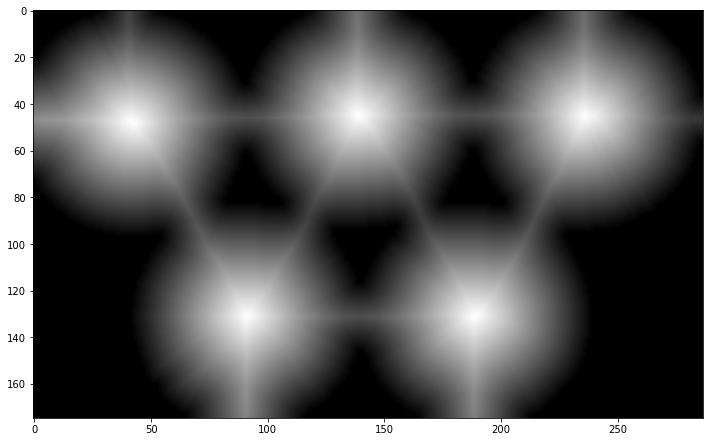

In [15]:
display(distance_transform) 

We have 5 clear points which is the foreground. We will apply thresholding to get those 5 dots. Then we apply the Watershed Algorithm.

In [16]:
ret, sure_foreground = cv2.threshold(distance_transform,0.7*distance_transform.max(),255,0) 

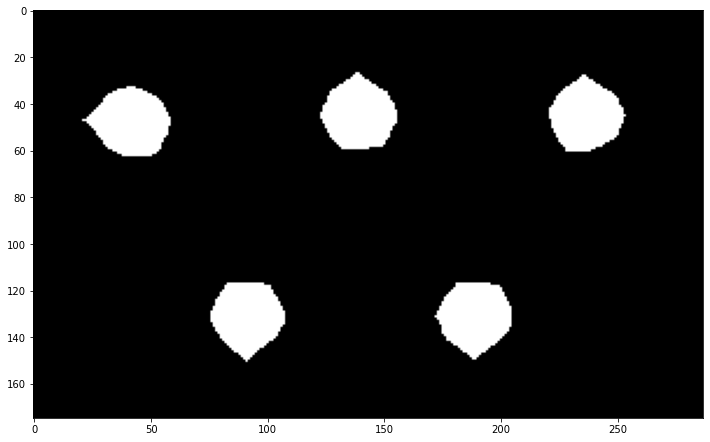

In [17]:
display(sure_foreground) 

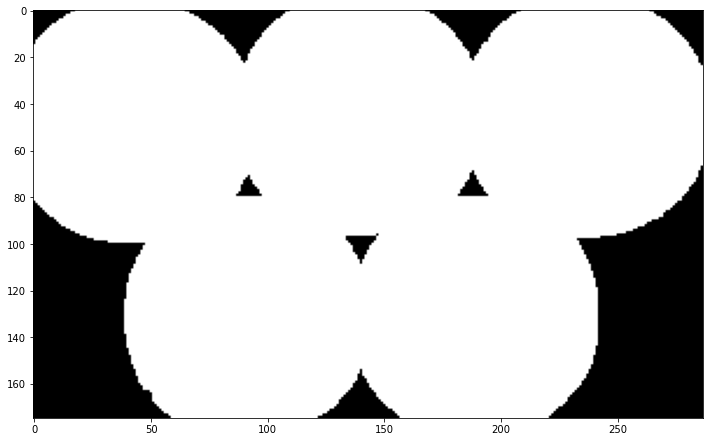

In [19]:
sure_background = cv2.dilate(opening,kernel,iterations=3) 
display(sure_background) 

Now we have the sure backgrounds and foregrounds. Now we have to find out the "in-between" section, which is the white part that has not been included in our sure foreground. So we use the Watershed Algorithm.

In [18]:
sure_foreground = np.uint8(sure_foreground) 

In [20]:
in_between = cv2.subtract(sure_background,sure_foreground) 

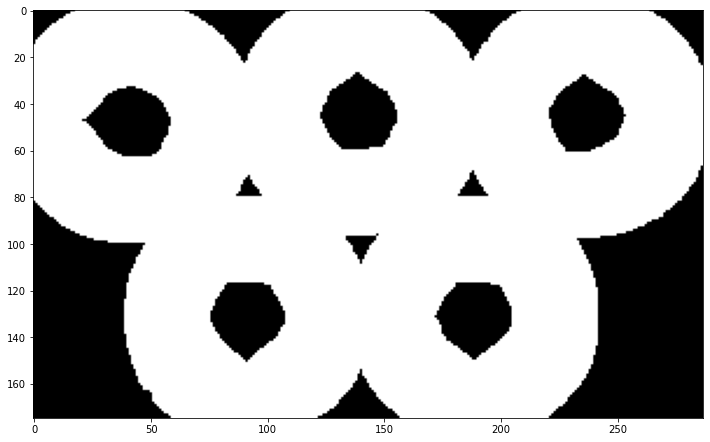

In [21]:
display(in_between) 

In [22]:
#CREATING THE MARKERS FOR THE WATERSHED ALGORITHM
ret, marker = cv2.connectedComponents(sure_foreground) 

What cv2.connectedComponents does is it returns the connected components of a binary image.

In [24]:
marker

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [25]:
marker = marker+1

In [26]:
marker

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

The reason we added 1 is because we want to denote the unknoown region as zero.

In [29]:
marker[in_between == 255] = 0

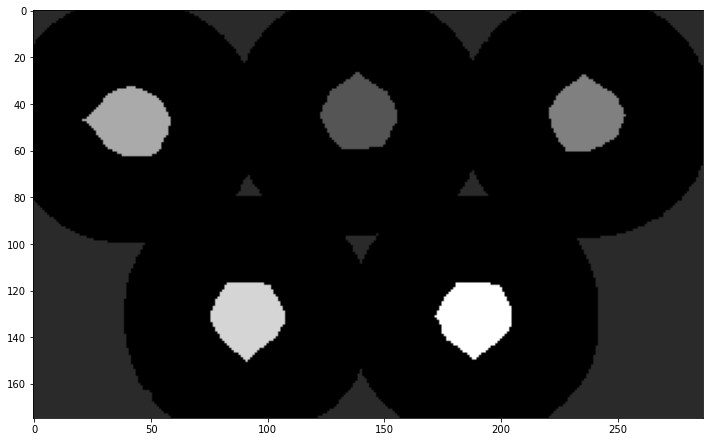

In [31]:
display(marker) 

In [33]:
#Apply the watershed algorithm to our markers
marker = cv2.watershed(pennies_img,marker) 

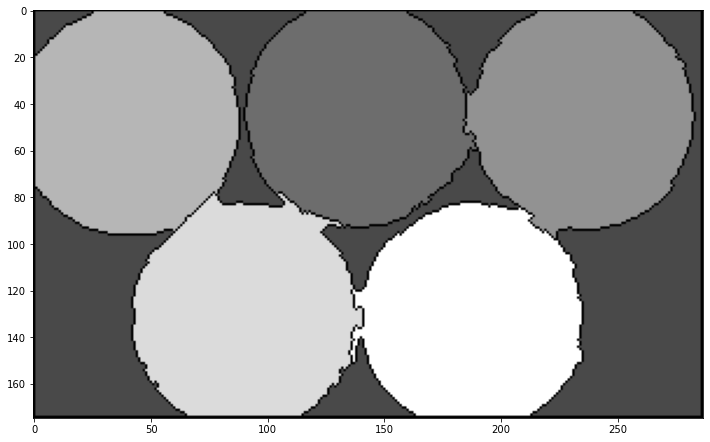

In [35]:
display(marker) 

In [36]:
#NOW WE FIND THE CONTOURS
contours,hierarchy = cv2.findContours(marker.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE) 
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1: #Extra Contours
        cv2.drawContours(pennies_img,contours,i,(255,0,0),10) 

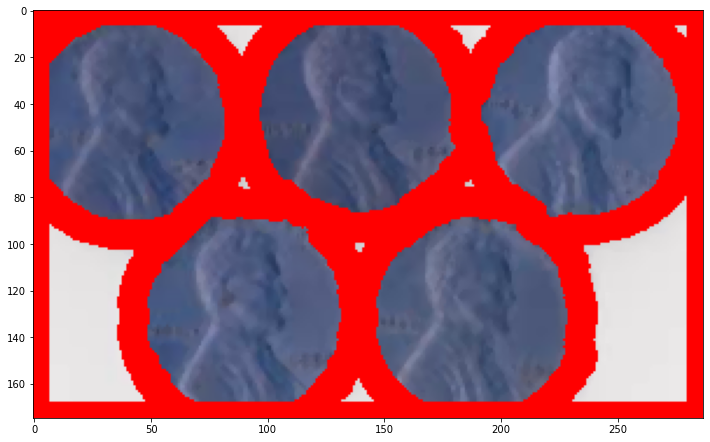

In [37]:
display(pennies_img) 

We successfully segmented the image!

Above, we used multiple image processing techniques in order to detect the markers (seeds) for the watershed algorithm. But, a simpler and a method with greater utility is that, we can click on the image, which segments the parts of the image. In brief, we set the seeds and segment them.

In [4]:
road_img = cv2.imread('C:/Users/email/OneDrive/Pictures/Ocean_Road.jpg') 

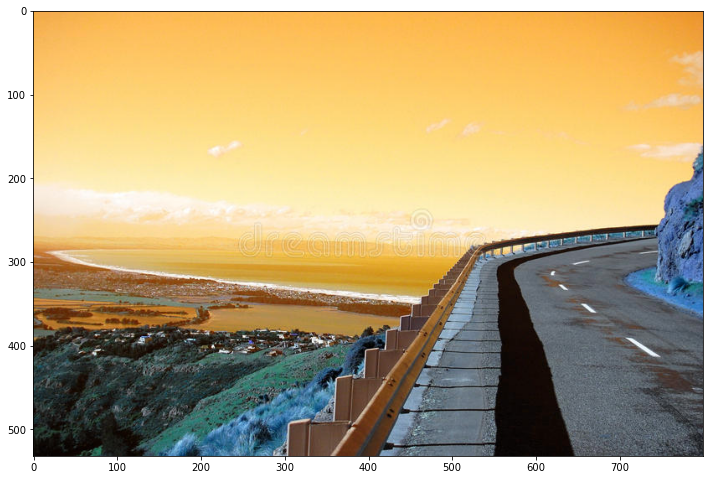

In [5]:
display(road_img) 

In [6]:
road_copy = np.copy(road_img) 

In [7]:
road_img.shape

(532, 800, 3)

Now, we will create an empty space for the results to be drawn onto.

In [8]:
marker_img = np.zeros(road_img.shape[:2],dtype=np.int32) 

In [9]:
segments = np.zeros(road_img.shape,dtype=np.int8) 

The color mapping we will be using now is that of matplotlib's.

In [10]:
from matplotlib import cm

In [11]:
cm.tab10(1)[:3] #RGB Values

(1.0, 0.4980392156862745, 0.054901960784313725)

In [12]:
#Multilying it by 255
tuple(np.array(cm.tab10(0)[:3])*255) 

(31.0, 119.0, 180.0)

In [13]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255) 

In [14]:
colors = []
for i in range(10):
    colors.append(create_rgb(i)) 

In [15]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [16]:
#GLOABL VARIABLES
color_choices = 10
current_marker = 1 #COLOR CHOICE (THE INDEX POSITION OF THE DESIRED COLOR IN THE COLORS ARRAY) 
markers_updated = False #CHECKS OF THE MARKER HAS BEEN UPDATED BY THE WATERSHED

In [17]:
#CALLBACK FUNCTION
def mouse_callback(event,x,y,flags,param):
    global markers_updated
    if event == cv2.EVENT_LBUTTONDOWN:
        #MARKERS PASSED TO THE WATERSHED ALGORITHM
        cv2.circle(marker_img,(x,y),10,(current_marker),-1) 
        #WHAT THE USER SEES
        cv2.circle(road_copy,(x,y),10,colors[current_marker],-1) 
        
        markers_updated = True

In [18]:
#WHILE TRUE
cv2.namedWindow('Road Pic') 
cv2.setMouseCallback('Road Pic', mouse_callback) 
while True:
    cv2.imshow('Watershed Segments',segments)
    cv2.imshow('Road Pic',road_copy) 
    
    #CLOSE ALL WINDOWS
    k = cv2.waitKey(1) 
    if k == 27:
        break
    #CLEAR ALL COLORS
    elif k == ord('c'):
        road_copy = road_img.copy() 
        marker_img = np.zeros(road_img.shape[:2],dtype=np.int32) 
        segments = np.zeros(road_img.shape,dtype=np.int8) 
    #UPDATE COLOR CHOICE
    elif k>0 and chr(k).isdigit():
        current_marker = int(chr(k)) 
    #UPDATE MARKINGS
    if markers_updated:
        marker_img_copy = marker_img.copy() 
        cv2.watershed(road_img,marker_img_copy) 
        
        segments = np.zeros(road_img.shape,dtype=np.int8) 
        for color_ind in range(color_choices):
            segments[marker_img_copy==(color_ind)] = colors[color_ind]
cv2.destroyAllWindows() 